Food Delivery Time rediction 

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [47]:
df= pd.read_csv("data/Food1.csv",encoding='unicode_escape')

In [48]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [49]:
df.drop(["ID","Delivery_person_ID"],axis=1,inplace=True)

In [50]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [51]:
df.isnull().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [52]:
def haversine_vectorized(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371
    return c * r

df['distance_km'] = haversine_vectorized(
    df['Restaurant_latitude'].values,
    df['Restaurant_longitude'].values,
    df['Delivery_location_latitude'].values,
    df['Delivery_location_longitude'].values
)



Standardisation

In [53]:
df.drop(["Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude"],axis=1,inplace=True)

In [54]:
df

,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,Time_taken(min),distance_km
0,37,4.9,Snack,motorcycle,24,3.025149
1,34,4.5,Snack,scooter,33,20.183530
2,23,4.4,Drinks,motorcycle,26,1.552758
3,38,4.7,Buffet,motorcycle,21,7.790401
4,32,4.6,Snack,scooter,30,6.210138
...,...,...,...,...,...,...
45588,30,4.8,Meal,motorcycle,32,1.489846
45589,21,4.6,Buffet,motorcycle,36,11.007735
45590,30,4.9,Drinks,scooter,16,4.657195
45591,20,4.7,Snack,motorcycle,26,6.232393


In [55]:

x=df.drop(['Time_taken(min)'],axis=1)
y=df['Time_taken(min)']

In [56]:
x.head()

,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,distance_km
0,37,4.9,Snack,motorcycle,3.025149
1,34,4.5,Snack,scooter,20.183530
2,23,4.4,Drinks,motorcycle,1.552758
3,38,4.7,Buffet,motorcycle,7.790401
4,32,4.6,Snack,scooter,6.210138


In [57]:
y.head()

0    24
1    33
2    26
3    21
4    30
Name: Time_taken(min), dtype: int64

Text(0, 0.5, 'rating')

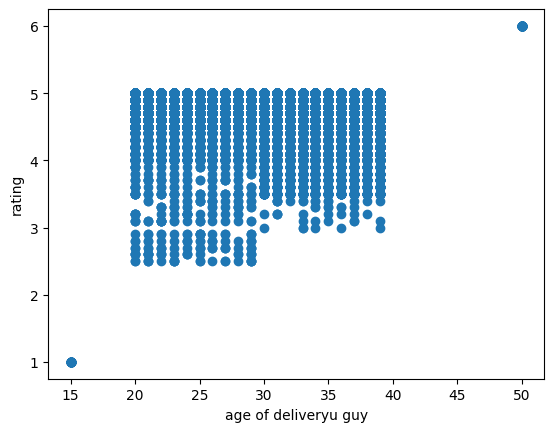

In [58]:
plt.scatter(df['Delivery_person_Age'],df['Delivery_person_Ratings'])
plt.xlabel("age of deliveryu guy")
plt.ylabel("rating")

<Axes: xlabel='Type_of_vehicle', ylabel='Time_taken(min)'>

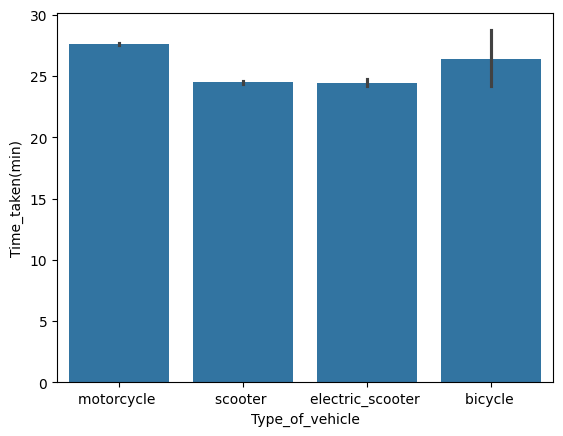

In [59]:
sns.barplot(x="Type_of_vehicle",y="Time_taken(min)",data=df)

Feature Scaling 

In [60]:
df['Type_of_order'].value_counts()

Type_of_order
Snack      11533
Meal       11458
Drinks     11322
Buffet     11280
Name: count, dtype: int64

In [61]:
df['Type_of_vehicle'].value_counts()

Type_of_vehicle
motorcycle           26435
scooter              15276
electric_scooter      3814
bicycle                 68
Name: count, dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      45593 non-null  int64  
 1   Delivery_person_Ratings  45593 non-null  float64
 2   Type_of_order            45593 non-null  object 
 3   Type_of_vehicle          45593 non-null  object 
 4   Time_taken(min)          45593 non-null  int64  
 5   distance_km              45593 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.1+ MB


In [63]:
pd.DataFrame(x)

,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,distance_km
0,37,4.9,Snack,motorcycle,3.025149
1,34,4.5,Snack,scooter,20.183530
2,23,4.4,Drinks,motorcycle,1.552758
3,38,4.7,Buffet,motorcycle,7.790401
4,32,4.6,Snack,scooter,6.210138
...,...,...,...,...,...
45588,30,4.8,Meal,motorcycle,1.489846
45589,21,4.6,Buffet,motorcycle,11.007735
45590,30,4.9,Drinks,scooter,4.657195
45591,20,4.7,Snack,motorcycle,6.232393


train and test split 

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape, x_test.shape

((31915, 5), (13678, 5))

In [65]:
num_features =x.select_dtypes(exclude="object").columns
non_num_features=['Type_of_order','Type_of_vehicle']

In [66]:

Standard=StandardScaler()
onehot=OneHotEncoder()
preprocessor = ColumnTransformer([("OneHotEncoder", onehot, non_num_features),
                                  ("StandardScaler", Standard, num_features)])

In [67]:
x_train=preprocessor.fit_transform(x_train)

In [68]:
x_test=preprocessor.transform(x_test)

In [69]:
x_train

array([[ 0.        ,  1.        ,  0.        , ...,  0.42608301,
         0.20564565, -0.08416309],
       [ 0.        ,  0.        ,  0.        , ..., -0.1004033 ,
        -0.09806471, -0.07898334],
       [ 0.        ,  0.        ,  0.        , ...,  0.60157845,
         0.20564565, -0.08030162],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  1.65455107,
         0.81306637, -0.08542212],
       [ 0.        ,  0.        ,  1.        , ..., -0.80238504,
         0.81306637, -0.0839734 ],
       [ 1.        ,  0.        ,  0.        , ...,  0.25058758,
        -0.09806471, -0.08268283]])

##Model Training By  Linear Logistic Regression 

In [70]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()
regression.fit(x_train,y_train)

reg_predicted=regression.predict(x_test)



print(mean_absolute_error(y_test,reg_predicted))
print(mean_squared_error(y_test,reg_predicted))
print(np.sqrt(mean_squared_error(y_test,reg_predicted)))
print(r2_score(y_test,reg_predicted))

6.619022320857399
69.90176168800987
8.360727342044463
0.20356328734261475


##Model Training By Lasso Logistic Regression 

In [71]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
lasso_predicted=lasso.predict(x_test)

print(mean_absolute_error(y_test,lasso_predicted))
print(mean_squared_error(y_test,lasso_predicted))
print(np.sqrt(mean_squared_error(y_test,lasso_predicted)))
print(r2_score(y_test,lasso_predicted))

6.789276806131214
73.78384861926102
8.589752535391286
0.15933211949915527


##Model Training By Ridge Regression 

In [72]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)
ridge_predicted=ridge.predict(x_test)

print(mean_absolute_error(y_test,ridge_predicted))
print(mean_squared_error(y_test,ridge_predicted))
print(np.sqrt(mean_squared_error(y_test,ridge_predicted)))
print(r2_score(y_test,ridge_predicted))

6.616771685158679
69.8928365741351
8.360193572767027
0.2036649770308695


##Model Training By Elasticnet Regression 

In [73]:
from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet()
elasticnet.fit(x_train,y_train)
elastic_predicted=elasticnet.predict(x_test)

print(mean_absolute_error(y_test,elastic_predicted))
print(mean_squared_error(y_test,elastic_predicted))
print(np.sqrt(mean_squared_error(y_test,elastic_predicted)))
print(r2_score(y_test,elastic_predicted))

6.853014113664183
74.45885402418114
8.62895439924103
0.15164133928506018


##Model Training By Logistic Regression 

In [74]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train,y_train)
logistic_predicted=logistic.predict(x_test)

print(mean_absolute_error(y_test,logistic_predicted))
print(mean_squared_error(y_test,logistic_predicted))
print(np.sqrt(mean_squared_error(y_test,logistic_predicted)))
print(r2_score(y_test,logistic_predicted))

6.7159672466734905
78.22335136715894
8.844396608427221
0.10874994690455908


##Model Training By Supoort Vector Machine Regression 


In [75]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
svr_predicted=svr.predict(x_test)

print(mean_absolute_error(y_test,svr_predicted))
print(mean_squared_error(y_test,svr_predicted))
print(np.sqrt(mean_squared_error(y_test,svr_predicted)))
print(r2_score(y_test,svr_predicted))

6.265940239209694
66.07268624971155
8.12851070305696
0.24719046040595882


##Model Training By K Nearest Neighbor Regression 


In [76]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
KNeighbors_predicted=knn.predict(x_test)

print(mean_absolute_error(y_test,KNeighbors_predicted))
print(mean_squared_error(y_test,KNeighbors_predicted))
print(np.sqrt(mean_squared_error(y_test,KNeighbors_predicted)))
print(r2_score(y_test,KNeighbors_predicted))

6.2796900131598195
64.10678169323
8.006671074374793
0.26958930307534046


##Model Training By Decision Tree


In [77]:
from sklearn.tree import DecisionTreeRegressor
Decisiontree_regressor=DecisionTreeRegressor()
Decisiontree_regressor.fit(x_train,y_train)
decision_predicted=Decisiontree_regressor.predict(x_test)

print(mean_absolute_error(y_test,decision_predicted))
print(mean_squared_error(y_test,decision_predicted))
print(np.sqrt(mean_squared_error(y_test,decision_predicted)))
print(r2_score(y_test,decision_predicted))

7.982904420724278
107.11780271644652
10.349773075601538
-0.2204635277053757


##Model Training By Random Forest Regression


In [78]:
from sklearn.ensemble import RandomForestRegressor
Randomforest_regressor=RandomForestRegressor()
Randomforest_regressor.fit(x_train,y_train)
random_predicted=Randomforest_regressor.predict(x_test)

print(mean_absolute_error(y_test,random_predicted))
print(mean_squared_error(y_test,random_predicted))
print(np.sqrt(mean_squared_error(y_test,random_predicted)))
print(r2_score(y_test,random_predicted))

6.129076447453458
61.626273531551746
7.85024034864868
0.29785136283320934


##Model Training By AdaBoost Regression


In [79]:
from sklearn.ensemble import AdaBoostRegressor
Adaboost_regressor=AdaBoostRegressor()
Adaboost_regressor.fit(x_train,y_train)
adaboost_predicted=Adaboost_regressor.predict(x_test)

print(mean_absolute_error(y_test,adaboost_predicted))
print(mean_squared_error(y_test,adaboost_predicted))
print(np.sqrt(mean_squared_error(y_test,adaboost_predicted)))
print(r2_score(y_test,adaboost_predicted))

6.043629993687171
56.63377306062328
7.525541379902397
0.3547342019346559


In [80]:
from sklearn.ensemble import GradientBoostingRegressor
Gradient_regressor=AdaBoostRegressor()
Gradient_regressor.fit(x_train,y_train)
gradient_predicted=Gradient_regressor.predict(x_test)

print(mean_absolute_error(y_test,gradient_predicted))
print(mean_squared_error(y_test,gradient_predicted))
print(np.sqrt(mean_squared_error(y_test,gradient_predicted)))
print(r2_score(y_test,gradient_predicted))

6.030162789268141
56.68050276024597
7.528645479782267
0.3542017797545529


In [81]:
from xgboost import XGBRegressor
xgb_regressor=XGBRegressor()
xgb_regressor.fit(x_train,y_train)
xgb_predicted=xgb_regressor.predict(x_test)

print(mean_absolute_error(y_test,xgb_predicted))
print(mean_squared_error(y_test,xgb_predicted))
print(np.sqrt(mean_squared_error(y_test,xgb_predicted)))
print(r2_score(y_test,xgb_predicted))

5.782647440074079
54.05213927067639
7.352016000436642
0.3841484785079956
